##LISTA 8 MAE0399

*   O número de instantes em que ocorre uma nova matrícula segue uma Poisson de parâmetro 2.
*   O tempo entre duas matrículas consecutivas segue uma distribuição exponencial de parâmetro 1/2.


*  O valor das mensalidades de cada segurado segue um uniforme em 50 e 150 reais, o que define a variável $R(t)$ que segue um distribuição de Poisson composta.



*   Os sinistros ocorrem segundo uma Poisson de parâmetro 1/30.

*   O tempo entre dois sinistros consecutivos segue uma distribuição exponencial com parâmetro 30.


*   O valor de reparo dos sinistros estamos considerando assumindo uma uniforme entre 2000 e 4000 reais, o que define a variável $D(t)$ com distribuição Poisson Composta.





In [ ]:
######################### IMPORTA AS BIBLIOTECAS ###########################
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson


###item a) Considere 1.000 simulações para as trajetórias de $R(t)$, $D(t)$ e $R(t) − D(t)$, para $t ∈ [0, 500]$. Para cada t ∈ {50, 100, . . . , 500} encontre os percentis $0,05$ e $99,5$ para os valores observados de $St$. Apresente estes valores em tabelas.





In [ ]:
#################################### TABELAS DOS QUANTIS #######################################

tabela_quantis_tempo_r = [[0 for k in range(3)] for i in range(10)]
tabela_quantis_tempo_s = [[0 for i in range(3)] for k in range(10)]
tabela_quantis_tempo_rs = [[0 for i in range(3)] for k in range(10)]

################################### TEMPOS PEDIDOS NO ENUNCIADO ###############################

tempos_pedidos = [i for i in range(50,550,50)]

#cada linha representa um tempo pedido, as colunas representam o s de cada iteração
tabela_ts_r = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_s = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_rs =pd.DataFrame([[0 for i in range(1000)] for k in range(10)])

########################### 1000 SIMULAÇOES #################################

for k in range(1000):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_novo_cliente = 0

  #INSTANTES DE NOVOS SINISTROS
  t_novo_sinistro = 0

  #DIFERENÇAS ENTRE TEMPOS
  t_dif = 0 

  #LISTA PARA OS TEMPOS
  lista_tempos_clientes = []
  lista_tempos_sinistros = []
  lista_diferenca_tempos = []

  #CONTADOR DE CLIENTES
  numero_clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_novo_cliente,t_novo_sinistro]) <= tempo_limite:

    #SE TEMPO FOR MENOR QUE LIMITE ENTRE
    if t_novo_cliente <= tempo_limite:
    
      #INCREMENTO DO CONTADOR
      numero_clientes += 1

      #APPENDA NO LISTA DE TEMPOS
      lista_tempos_clientes.append(t_novo_cliente)

      #INCREMENTOS TEMPOS NOVOS CLIENTES
      t_novo_cliente += random.expovariate(2)

      #APPENDA NA LISTA
      lista_R_t.append(R_t)

      #INCREMENTO VARIAVEl DE LUCRO
      R_t += random.normalvariate(100,49)

  
    #SE O INSTANTE DO SINISTRO FOR MENOR Q LIMITE ENTRE
    if t_novo_sinistro <= tempo_limite:

      #APPENDA NA LISTA
      lista_tempos_sinistros.append(t_novo_sinistro)

      #INCREMENTO TEMPOS DOS SINISTROS
      t_novo_sinistro += random.expovariate (1/30) 

      #APPENDA NA LISTA
      lista_D_t.append(D_t)
      
      #INCREMENTO VARIAVEL DE PERDA
      D_t += random.normalvariate(3000,1000)
    

  ############################### TEMPOS DO ENUNCIADO #####################################

  for tempo in tempos_pedidos:

      #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
      lista_boa_clientes = []
      lista_boa_sinistros = []
      
      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t1 in lista_tempos_clientes:
        if t1 <= tempo: lista_boa_clientes.append(t1)

      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t2 in lista_tempos_sinistros:
        if t2 <= tempo: lista_boa_sinistros.append(t2)
      
     
      #APPENDA NA TABELA DE 1000 INTERAÇÕES OS CUSTOS/LUCROS RELATIVOS AO ULTIMO TEMPO QUE NAO ULTRAPASSOU
      tabela_ts_r.iloc[(tempo//50)-1,k] =  lista_R_t[len(lista_boa_clientes)-1]
      tabela_ts_s.iloc[(tempo//50)-1,k] =  lista_D_t[len(lista_boa_sinistros)-1]
      tabela_ts_rs.iloc[(tempo//50)-1,k] = lista_R_t[len(lista_boa_clientes)-1] - lista_D_t[len(lista_boa_sinistros)-1]


#AGORA PRA CADA TEMPO CALCULA O QUANTIL DA SUA LINHA E APPENDA NA TABELA QUANTIS

for tempo in tempos_pedidos:

  tabela_quantis_tempo_r[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_r[(tempo//50)-1][1] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_r[(tempo//50)-1][2] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.95)

  tabela_quantis_tempo_s[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_s[(tempo//50)-1][1] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_s[(tempo//50)-1][2] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.95)

  tabela_quantis_tempo_rs[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_rs[(tempo//50)-1][1] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_rs[(tempo//50)-1][2] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.95)


#TRANFORMA EM DATAFRAME E RENOMEIA AS COLUNAS

tabela_quantis_tempo_r = pd.DataFrame(tabela_quantis_tempo_r)
tabela_quantis_tempo_r.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%'},inplace = True)

tabela_quantis_tempo_s = pd.DataFrame(tabela_quantis_tempo_s)
tabela_quantis_tempo_s.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%'},inplace = True)

tabela_quantis_tempo_rs =  pd.DataFrame(tabela_quantis_tempo_rs)
tabela_quantis_tempo_rs.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%'},inplace = True)


  

###Tabela de quantis $S(t)$

In [ ]:
tabela_quantis_tempo_s

,t,Quantil 5%,Quantil 95%
0,50,0.000000,12398.469474
1,100,2257.886065,21092.494810
2,150,5679.496848,28460.591920
3,200,8170.617012,35318.349774
4,250,11214.173984,41134.744968
5,300,14798.670752,47883.029211
6,350,18113.635879,54144.939941
7,400,22053.998218,60271.265931
8,450,24911.419972,66078.299661
9,500,29337.442093,71823.787459


###Tabela de quantis $R(t)$

In [ ]:
tabela_quantis_tempo_r

,t,Quantil 5%,Quantil 95%
0,50,8123.310152,11862.007444
1,100,17543.202297,22395.171846
2,150,26764.458921,33156.755805
3,200,36423.009703,43749.603356
4,250,45828.404269,53889.431598
5,300,55552.050455,64316.930521
6,350,65248.806548,74486.153610
7,400,75109.352440,84945.492617
8,450,84618.164252,95405.477391
9,500,94502.449843,105659.837693


###Tabela de quantis $R(t) - S(t)$

In [ ]:
tabela_quantis_tempo_rs

,t,Quantil 5%,Quantil 95%
0,50,-2719.090903,10588.770561
1,100,-1225.837753,18066.027257
2,150,1450.736210,24812.589993
3,200,4842.274788,32137.966908
4,250,8058.770986,39074.184461
5,300,11191.263046,46257.463368
6,350,14984.008833,52126.891316
7,400,18354.996637,58024.144688
8,450,23145.043571,65053.261881
9,500,27187.738980,71753.668879


###item b)  Apresente em um so gráfico:
###*A trajetoria de 5 simulações, plotando os valores de $R(t) − D(t)$
###*Os valores da tabela do item a, apenas para $R(t) − D(t)$
###*A função $E[R(t) − D(t)]$



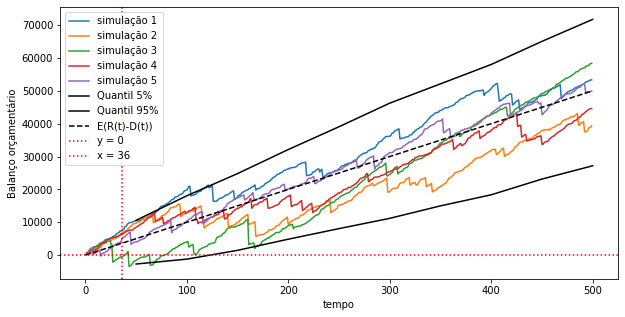

In [ ]:
############################ 5 SIMULAÇÕES ##################################

for k in range(5):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_r = 0

  #INSTANTES DE NOVOS SINISTROS
  t_s = 0

  #CONTADOR DE CLIENTES
  clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #LISTA PARA O TEMPO 
  tempo_linear = [i for i in range(1,500,1)]

  #LISTA PARA OS INSTANTES DE OCORRENCIAS SINISTROS E CLIENTES
  tempos_clientes = []
  tempos_sinistros = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_r,t_s]) <= tempo_limite:
    
    #SE FOR MENOS QUE O TEMPO LIMITE ENTRA
    if t_r <= tempo_limite:

      random.seed()

      #INCREMENTA CLIENTES
      clientes +=1

      #APPENDA NAS RESPECTIVAS LISTAS
      lista_R_t.append(R_t)
      tempos_clientes.append(t_r)

      #INCREMENTA INSTANTE DE NOVOS CLIENTES
      t_r += random.expovariate(2)
      #INCREMENTA GANHO
      R_t += random.normalvariate(100,49)
      

    #PERCORRE ATÉ TEMPO LIMITE
    if t_s <= tempo_limite:

      random.seed()

      #APPENDA NAS RESPECTIVAS LISTAS
      lista_D_t.append(D_t)
      tempos_sinistros.append(t_s)
      #INCREMENTA INSTANTES DE SINISTROS
      t_s += random.expovariate(1/30) 
      #INCREMENTA VALOR DOS SINISTROS
      D_t += random.normalvariate(3000,1000)
      

  #LISTA PRAS DIFERENÇAS ENTRE S(t) e R(t)
  diferencas = []

  #PERCORRE TEMPO 500 DE UM EM UM
  for tempo_especifico in tempo_linear:

    #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
    lista_boa_clientes = []
    lista_boa_sinistros = []

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for t in tempos_clientes:
      if t <= tempo_especifico: lista_boa_clientes.append(t)

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for tt in tempos_sinistros:
      if tt <= tempo_especifico: lista_boa_sinistros.append(tt)


    #CALCULA DIF E APPENDA NA LISTA 
    parte_r = lista_R_t[len(lista_boa_clientes)-1]
    parte_s = lista_D_t[len(lista_boa_sinistros)-1]
    diferencas.append(parte_r - parte_s)
    
 
  #PRA CADA SIMULAÇÃO PLOTA A TRAJETÓRIA
  plt.plot([tempo for tempo in range(1,500,1)],diferencas, label = f'simulação {k+1}')

#GRAFICO DOS QUANTIS  95 E 5 DA DIFERENÇA
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 5%'], color = 'black', label = 'Quantil 5%')
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 95%'], color = 'black', label = 'Quantil 95%')

#GRÁFICO DA ESPERANÇA DA DIDFERENÇA
plt.plot([i for i in range(0,500,1)],[100*i for i in range(0,500,1)],color = 'black',linestyle = '--', label = 'E(R(t)-D(t))')
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(y = 0, xmin = 0, xmax = 500,linestyle = ':', color = 'red', label = 'y = 0')
plt.axvline(x= 36, ymin= 0, ymax=20000, linestyle = ':', color = 'red', label = 'x = 36')
plt.ylabel('Balanço orçamentário')
plt.xlabel('tempo')
plt.legend()
plt.show()

###item c) Repita o exercício inserindo a ideia de franquia, ou seja, que o sinistro so seja coberto pela seguradora caso o seu valor seja superior a $ 3000,00.

In [ ]:
#################################### TABELAS DOS QUANTIS #######################################

#uma coluna a mais para armazenar a media
tabela_quantis_tempo_r = [[0 for k in range(4)] for i in range(10)]
tabela_quantis_tempo_s = [[0 for i in range(4)] for k in range(10)]
tabela_quantis_tempo_rs = [[0 for i in range(4)] for k in range(10)]

################################### TEMPOS PEDIDOS NO ENUNCIADO ###############################

tempos_pedidos = [i for i in range(50,550,50)]

#cada linha representa um tempo pedido, as colunas representam o s de cada iteração
tabela_ts_r = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_s = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_rs =pd.DataFrame([[0 for i in range(1000)] for k in range(10)])

########################### 1000 SIMULAÇOES #################################

for k in range(1000):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_novo_cliente = 0

  #INSTANTES DE NOVOS SINISTROS
  t_novo_sinistro = 0

  #DIFERENÇAS ENTRE TEMPOS
  t_dif = 0 

  #LISTA PARA OS TEMPOS
  lista_tempos_clientes = []
  lista_tempos_sinistros = []
  lista_diferenca_tempos = []

  #CONTADOR DE CLIENTES
  numero_clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_novo_cliente,t_novo_sinistro]) <= tempo_limite:

    #SE TEMPO FOR MENOR QUE LIMITE ENTRE
    if t_novo_cliente <= tempo_limite:
    
      #INCREMENTO DO CONTADOR
      numero_clientes += 1

      #APPENDA NO LISTA DE TEMPOS
      lista_tempos_clientes.append(t_novo_cliente)

      #INCREMENTOS TEMPOS NOVOS CLIENTES
      t_novo_cliente += random.expovariate(2)

      #APPENDA NA LISTA
      lista_R_t.append(R_t)

      #INCREMENTO VARIAVEl DE LUCRO
      R_t += random.normalvariate(100,49)

      

    if t_novo_sinistro <= tempo_limite:

      valor_sinistro = random.normalvariate(3000,1000)

      if valor_sinistro >= 3000:

        #APPENDA NA LISTA
        lista_tempos_sinistros.append(t_novo_sinistro)

        #INCREMENTO TEMPOS DOS SINISTROS
        t_novo_sinistro += random.expovariate (1/30) 

        #APPENDA NA LISTA
        lista_D_t.append(D_t)
        
        #INCREMENTO VARIAVEL DE PERDA
        D_t += valor_sinistro
      

  ############################### TEMPOS DO ENUNCIADO #####################################

  for tempo in tempos_pedidos:

      #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
      lista_boa_clientes = []
      lista_boa_sinistros = []
      
      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t1 in lista_tempos_clientes:
        if t1 <= tempo: lista_boa_clientes.append(t1)

      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t2 in lista_tempos_sinistros:
        if t2 <= tempo: lista_boa_sinistros.append(t2)
      
     
      #APPENDA NA TABELA DE 1000 INTERAÇÕES OS CUSTOS/LUCROS RELATIVOS AO ULTIMO TEMPO QUE NAO ULTRAPASSOU
      tabela_ts_r.iloc[(tempo//50)-1,k] =  lista_R_t[len(lista_boa_clientes)-1]
      tabela_ts_s.iloc[(tempo//50)-1,k] =  lista_D_t[len(lista_boa_sinistros)-1]
      tabela_ts_rs.iloc[(tempo//50)-1,k] = lista_R_t[len(lista_boa_clientes)-1] - lista_D_t[len(lista_boa_sinistros)-1]


#AGORA PRA CADA TEMPO CALCULA O QUANTIL DA SUA LINHA E APPENDA NA TABELA QUANTIS

for tempo in tempos_pedidos:

  tabela_quantis_tempo_r[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_r[(tempo//50)-1][1] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_r[(tempo//50)-1][2] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_r[(tempo//50)-1][3] =  tabela_ts_r.iloc[(tempo//50)-1].mean()

  tabela_quantis_tempo_s[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_s[(tempo//50)-1][1] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_s[(tempo//50)-1][2] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_s[(tempo//50)-1][3] =  tabela_ts_s.iloc[(tempo//50)-1].mean()

  tabela_quantis_tempo_rs[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_rs[(tempo//50)-1][1] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_rs[(tempo//50)-1][2] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_rs[(tempo//50)-1][3] =  tabela_ts_rs.iloc[(tempo//50)-1].mean()


#TRANFORMA EM DATAFRAME E RENOMEIA AS COLUNAS

tabela_quantis_tempo_r = pd.DataFrame(tabela_quantis_tempo_r)
tabela_quantis_tempo_r.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)

tabela_quantis_tempo_s = pd.DataFrame(tabela_quantis_tempo_s)
tabela_quantis_tempo_s.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)

tabela_quantis_tempo_rs =  pd.DataFrame(tabela_quantis_tempo_rs)
tabela_quantis_tempo_rs.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)


  

##Tabela de quantis de $S(t)$

In [ ]:
tabela_quantis_tempo_s

,t,Quantil 5%,Quantil 95%,Média
0,50,0.000000,15773.369808,6468.946775
1,100,3175.932105,26037.168524,12824.043406
2,150,6421.779183,34223.909449,19117.644643
3,200,9835.194911,42350.078501,25368.887761
4,250,14211.049018,52181.848037,31581.694744
5,300,19091.944154,60404.306385,37937.035059
6,350,23437.667686,67808.908355,44087.847581
7,400,29236.431946,74867.878833,50241.845969
8,450,34560.186353,81934.267094,56689.949872
9,500,38901.820956,89073.486792,62924.454877


##Tabela de quantis $R(t)$

In [ ]:
tabela_quantis_tempo_r

,t,Quantil 5%,Quantil 95%,Média
0,50,8292.921961,11907.686333,10086.596624
1,100,17444.515107,22471.960820,20019.381424
2,150,26811.089669,33163.400171,30021.431372
3,200,36375.749139,43576.469159,40015.839959
4,250,46207.921160,54334.029567,50066.654654
5,300,55647.979315,64498.658818,60065.564942
6,350,65232.802335,75055.578808,70045.234500
7,400,74999.930157,85195.268227,80013.166360
8,450,84742.611356,95637.261042,90015.018453
9,500,94222.936719,106111.421200,100009.491792


##Tabela de quantis $R(t) - D(t)$

In [ ]:
tabela_quantis_tempo_rs

,t,Quantil 5%,Quantil 95%,Média
0,50,-5844.911827,10613.284650,3617.649849
1,100,-5963.917290,17855.597970,7195.338018
2,150,-5270.021380,24707.830350,10903.786729
3,200,-2906.667630,30965.062599,14646.952197
4,250,-2270.134438,35948.262637,18484.959910
5,300,-515.858397,41397.903140,22128.529883
6,350,2535.573572,46708.289688,25957.386919
7,400,5080.385059,51137.928180,29771.320390
8,450,8716.854996,56203.761912,33325.068580
9,500,10869.531292,60516.009170,37085.036915


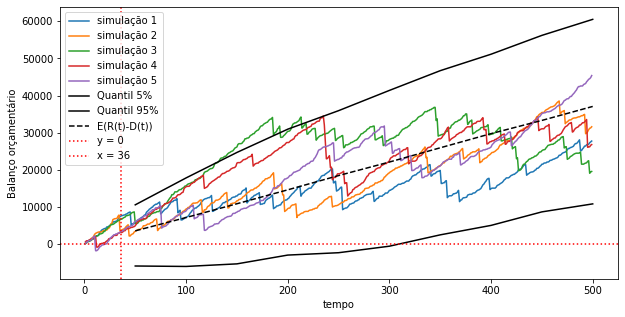

In [ ]:
############################ 5 SIMULAÇÕES ##################################

for k in range(5):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_r = 0

  #INSTANTES DE NOVOS SINISTROS
  t_s = 0

  #CONTADOR DE CLIENTES
  clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #LISTA PARA O TEMPO 
  tempo_linear = [i for i in range(1,500,1)]

  #LISTA PARA OS INSTANTES DE OCORRENCIAS SINISTROS E CLIENTES
  tempos_clientes = []
  tempos_sinistros = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_r,t_s]) <= tempo_limite:
    
    #SE FOR MENOS QUE O TEMPO LIMITE ENTRA
    if t_r <= tempo_limite:

      random.seed()

      #INCREMENTA CLIENTES
      clientes +=1
      #APPENDA NAS RESPECTIVAS LISTAS
      lista_R_t.append(R_t)
      tempos_clientes.append(t_r)
      #INCREMENTA INSTANTE DE NOVOS CLIENTES
      t_r += random.expovariate(2)
      #INCREMENTA GANHO
      R_t += random.normalvariate(100,49)
      

    #PERCORRE ATÉ TEMPO LIMITE
    if t_s <= tempo_limite:

      random.seed()

      valor_sinistro = random.normalvariate(3000,1000)
      
      if valor_sinistro >= 3000:
        #APPENDA NAS RESPECTIVAS LISTAS
        lista_D_t.append(D_t)
        tempos_sinistros.append(t_s)
        #INCREMENTA INSTANTES DE SINISTROS
        t_s += random.expovariate(1/30) 
        #INCREMENTA VALOR DOS SINISTROS
        D_t += valor_sinistro
       

  #LISTA PRAS DIFERENÇAS ENTRE S(t) e R(t)
  diferencas = []

  #PERCORRE TEMPO 500 DE UM EM UM
  for tempo_especifico in tempo_linear:

    #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
    lista_boa_clientes = []
    lista_boa_sinistros = []

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for t in tempos_clientes:
      if t <= tempo_especifico: lista_boa_clientes.append(t)

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for tt in tempos_sinistros:
      if tt <= tempo_especifico: lista_boa_sinistros.append(tt)


    #CALCULA DIF E APPENDA NA LISTA 
    parte_r = lista_R_t[len(lista_boa_clientes)-1]
    parte_s = lista_D_t[len(lista_boa_sinistros)-1]
    diferencas.append(parte_r - parte_s)
    
 
  #PRA CADA SIMULAÇÃO PLOTA A TRAJETÓRIA
  plt.plot([tempo for tempo in range(1,500,1)],diferencas, label = f'simulação {k+1}')

#GRAFICO DOS QUANTIS  95 E 5 DA DIFERENÇA
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 5%'], color = 'black', label = 'Quantil 5%')
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 95%'], color = 'black', label = 'Quantil 95%')

#GRÁFICO DA ESPERANÇA DA DIDFERENÇA
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Média'], color = 'black', label = 'E(R(t)-D(t))',linestyle = '--')
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(y = 0, xmin = 0, xmax = 500,linestyle = ':', color = 'red', label = 'y = 0')
plt.axvline(x= 36, ymin= 0, ymax=20000, linestyle = ':', color = 'red', label = 'x = 36')
plt.ylabel('Balanço orçamentário')
plt.xlabel('tempo')
plt.legend()
plt.show()

###item d) Repita o exercício fazendo alguma modificação (a seu critério) na distribuição do valor das mensalidades e/ou no valor da franquia, objetivando diminuir a chance de $R(t) < D(t)$ para algum t mas mantendo valores (baixos) em condições de competir com outras empresas.

In [ ]:
################################### COMENTÁRIO #################################################

''' AQUI UTILIZEI A DISTRIBUIÇÃO DE PAGAMENTOS COMO UMA UNIFORME ENTRE 100 E 150, MANTENDO O PREÇO RELATIVAMENTE BAIXO. E TAMBÉM AUMENTEI O VALOR DE FRANQUIA 
PARA A SEGURADORA PAGAR SINISTROS APENAS ACIMA DE 3500, COMO PODE SER VISTO NO GRAFICO AO FINAL, O BALANÇO FICA POSITIVO PARA TEMPO MAIOR QUE 36 DIAS'''

#################################### TABELAS DOS QUANTIS #######################################

tabela_quantis_tempo_r = [[0 for k in range(4)] for i in range(10)]
tabela_quantis_tempo_s = [[0 for i in range(4)] for k in range(10)]
tabela_quantis_tempo_rs = [[0 for i in range(4)] for k in range(10)]

################################### TEMPOS PEDIDOS NO ENUNCIADO ###############################

tempos_pedidos = [i for i in range(50,550,50)]

#cada linha representa um tempo pedido, as colunas representam o s de cada iteração
tabela_ts_r = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_s = pd.DataFrame([[0 for i in range(1000)] for k in range(10)])
tabela_ts_rs =pd.DataFrame([[0 for i in range(1000)] for k in range(10)])

########################### 1000 SIMULAÇOES #################################

for k in range(1000):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_novo_cliente = 0

  #INSTANTES DE NOVOS SINISTROS
  t_novo_sinistro = 0

  #DIFERENÇAS ENTRE TEMPOS
  t_dif = 0 

  #LISTA PARA OS TEMPOS
  lista_tempos_clientes = []
  lista_tempos_sinistros = []
  lista_diferenca_tempos = []

  #CONTADOR DE CLIENTES
  numero_clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_novo_cliente,t_novo_sinistro]) <= tempo_limite:

    #SE TEMPO FOR MENOR QUE LIMITE ENTRE
    if t_novo_cliente <= tempo_limite:
    
      #INCREMENTO DO CONTADOR
      numero_clientes += 1

      #APPENDA NO LISTA DE TEMPOS
      lista_tempos_clientes.append(t_novo_cliente)

      #INCREMENTOS TEMPOS NOVOS CLIENTES
      t_novo_cliente += random.expovariate(2)

      #APPENDA NA LISTA
      lista_R_t.append(R_t)

      #INCREMENTO VARIAVEl DE LUCRO
      R_t += random.normalvariate(100,49)

      

    if t_novo_sinistro <= tempo_limite:

      valor_sinistro = random.normalvariate(3000,1000)

      if valor_sinistro >= 3500:

        #APPENDA NA LISTA
        lista_tempos_sinistros.append(t_novo_sinistro)

        #INCREMENTO TEMPOS DOS SINISTROS
        t_novo_sinistro += random.expovariate (1/30) 

        #APPENDA NA LISTA
        lista_D_t.append(D_t)
        
        #INCREMENTO VARIAVEL DE PERDA
        D_t += valor_sinistro
      

  ############################### TEMPOS DO ENUNCIADO #####################################

  for tempo in tempos_pedidos:

      #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
      lista_boa_clientes = []
      lista_boa_sinistros = []
      
      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t1 in lista_tempos_clientes:
        if t1 <= tempo: lista_boa_clientes.append(t1)

      #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
      for t2 in lista_tempos_sinistros:
        if t2 <= tempo: lista_boa_sinistros.append(t2)
      
     
      #APPENDA NA TABELA DE 1000 INTERAÇÕES OS CUSTOS/LUCROS RELATIVOS AO ULTIMO TEMPO QUE NAO ULTRAPASSOU
      tabela_ts_r.iloc[(tempo//50)-1,k] =  lista_R_t[len(lista_boa_clientes)-1]
      tabela_ts_s.iloc[(tempo//50)-1,k] =  lista_D_t[len(lista_boa_sinistros)-1]
      tabela_ts_rs.iloc[(tempo//50)-1,k] = lista_R_t[len(lista_boa_clientes)-1] - lista_D_t[len(lista_boa_sinistros)-1]


#AGORA PRA CADA TEMPO CALCULA O QUANTIL DA SUA LINHA E APPENDA NA TABELA QUANTIS

for tempo in tempos_pedidos:

  tabela_quantis_tempo_r[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_r[(tempo//50)-1][1] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_r[(tempo//50)-1][2] =  tabela_ts_r.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_r[(tempo//50)-1][3] =  tabela_ts_r.iloc[(tempo//50)-1].mean()

  tabela_quantis_tempo_s[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_s[(tempo//50)-1][1] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_s[(tempo//50)-1][2] =  tabela_ts_s.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_r[(tempo//50)-1][3] =  tabela_ts_s.iloc[(tempo//50)-1].mean()

  tabela_quantis_tempo_rs[(tempo//50)-1][0] = tempo
  tabela_quantis_tempo_rs[(tempo//50)-1][1] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.05)
  tabela_quantis_tempo_rs[(tempo//50)-1][2] =  tabela_ts_rs.iloc[(tempo//50)-1].quantile(0.95)
  tabela_quantis_tempo_rs[(tempo//50)-1][3] =  tabela_ts_rs.iloc[(tempo//50)-1].mean()


#TRANFORMA EM DATAFRAME E RENOMEIA AS COLUNAS

tabela_quantis_tempo_r = pd.DataFrame(tabela_quantis_tempo_r)
tabela_quantis_tempo_r.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)

tabela_quantis_tempo_s = pd.DataFrame(tabela_quantis_tempo_s)
tabela_quantis_tempo_s.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)

tabela_quantis_tempo_rs =  pd.DataFrame(tabela_quantis_tempo_rs)
tabela_quantis_tempo_rs.rename(columns={0: 't',1:'Quantil 5%',2:'Quantil 95%',3:'Média'},inplace = True)


  

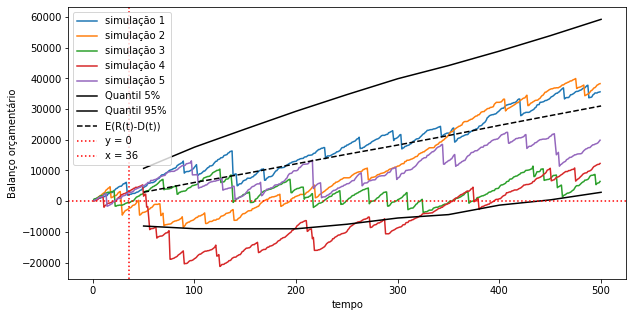

In [ ]:
############################ 5 SIMULAÇÕES ##################################

for k in range(5):

  #TEMPO LIMITE
  tempo_limite = 500

  #INSTANTES DE NOVOS CLIENTES
  t_r = 0

  #INSTANTES DE NOVOS SINISTROS
  t_s = 0

  #CONTADOR DE CLIENTES
  clientes = 0

  #VARIAVEIS DE CUSTO
  R_t = 0
  D_t = 0

  #LISTA PRA VARIAVEIS DE CUSTOS
  lista_R_t = []
  lista_D_t = []

  #LISTA PARA O TEMPO 
  tempo_linear = [i for i in range(1,500,1)]

  #LISTA PARA OS INSTANTES DE OCORRENCIAS SINISTROS E CLIENTES
  tempos_clientes = []
  tempos_sinistros = []

  #PERCCORE ATÉ TEMPO LIMITE
  while  min([t_r,t_s]) <= tempo_limite:
    
    #SE FOR MENOS QUE O TEMPO LIMITE ENTRA
    if t_r <= tempo_limite:

      random.seed()

      #INCREMENTA CLIENTES
      clientes +=1
      #APPENDA NAS RESPECTIVAS LISTAS
      lista_R_t.append(R_t)
      tempos_clientes.append(t_r)
      #INCREMENTA INSTANTE DE NOVOS CLIENTES
      t_r += random.expovariate(2)
      #INCREMENTA GANHO
      R_t += random.normalvariate(100,49)
      

    #PERCORRE ATÉ TEMPO LIMITE
    if t_s <= tempo_limite:

      random.seed()

      valor_sinistro = random.normalvariate(3000,1000)
      
      if valor_sinistro >= 3500:
        #APPENDA NAS RESPECTIVAS LISTAS
        lista_D_t.append(D_t)
        tempos_sinistros.append(t_s)
        #INCREMENTA INSTANTES DE SINISTROS
        t_s += random.expovariate(1/30) 
        #INCREMENTA VALOR DOS SINISTROS
        D_t += valor_sinistro
       

  #LISTA PRAS DIFERENÇAS ENTRE S(t) e R(t)
  diferencas = []

  #PERCORRE TEMPO 500 DE UM EM UM
  for tempo_especifico in tempo_linear:

    #LISTAS PARA GUARDAR TEMPOS QUE NÃO EXCEDEM O TEMPO ESPECIFICO
    lista_boa_clientes = []
    lista_boa_sinistros = []

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for t in tempos_clientes:
      if t <= tempo_especifico: lista_boa_clientes.append(t)

    #PRA CADA TEMPO SE FOR MENOR ENTRE NA LISTA
    for tt in tempos_sinistros:
      if tt <= tempo_especifico: lista_boa_sinistros.append(tt)


    #CALCULA DIF E APPENDA NA LISTA 
    parte_r = lista_R_t[len(lista_boa_clientes)-1]
    parte_s = lista_D_t[len(lista_boa_sinistros)-1]
    diferencas.append(parte_r - parte_s)
    
 
  #PRA CADA SIMULAÇÃO PLOTA A TRAJETÓRIA
  plt.plot([tempo for tempo in range(1,500,1)],diferencas, label = f'simulação {k+1}')

#GRAFICO DOS QUANTIS  95 E 5 DA DIFERENÇA
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 5%'], color = 'black', label = 'Quantil 5%')
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Quantil 95%'], color = 'black', label = 'Quantil 95%')

#GRÁFICO DA ESPERANÇA DA DIDFERENÇA
plt.plot([i for i in range(50,550,50)],tabela_quantis_tempo_rs['Média'], color = 'black', label = 'E(R(t)-D(t))',linestyle = '--')
plt.rcParams["figure.figsize"] = (10,5)
plt.axhline(y = 0, xmin = 0, xmax = 500,linestyle = ':', color = 'red', label = 'y = 0')
plt.axvline(x= 36, ymin= 0, ymax=20000, linestyle = ':', color = 'red', label = 'x = 36')
plt.legend()
plt.ylabel('Balanço orçamentário')
plt.xlabel('tempo')
plt.show()